<a href="https://colab.research.google.com/github/CKabuga/intro-to-github/blob/main/irisdataset_dsc_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import Libraries

In [6]:
from pandas import read_csv
#from pandas.plotting import scatter_matrix
#from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Load Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
###################METHOD 1 - TO READ FROM YOUR OWN FILE IN DRIVE

!pwd
%cd /content/drive/MyDrive/dss
%ls

dataset = read_csv('iris.csv')
print (dataset)

###################METHOD 2 - TO READ FROM URL

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'category']
dataset = read_csv(url, names=names)



/content/drive/MyDrive
/content/drive/MyDrive/dss
apple_stock.csv  apple_stock.gsheet  iris.csv  penguins.csv
     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [9]:
print (dataset.head(10))
print (dataset.tail(3))
print(dataset.shape)
print (dataset.describe())

print (dataset.groupby('category').size())

   sepal-length  sepal-width  petal-length  petal-width     category
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width        category
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9  

# Visualizations

In [10]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


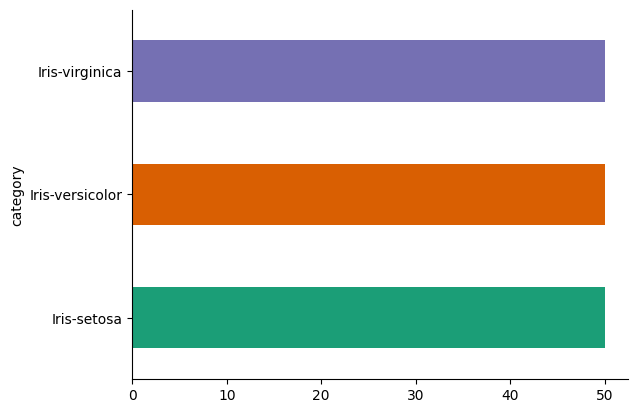

In [11]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Partitioning the data

In [12]:

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
X_validation.shape

(30, 4)

# Model Creation and Training

In [14]:
model = LogisticRegression(max_iter=500)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

print (cv_results)
print (cv_results.mean())

[1.         0.91666667 1.         1.         0.91666667 0.91666667
 1.         1.         0.91666667 1.        ]
0.9666666666666666


In [15]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

# Predictions and Testing

In [16]:

# Predictions and Testing
predictions = model.predict(X_validation)
print (X_validation)
print(predictions)
print (Y_validation)

print ('accuracy score')
print(accuracy_score(Y_validation, predictions))

print ('confusion matrix')
print(confusion_matrix(Y_validation, predictions))

print ('classification report')
print(classification_report(Y_validation, predictions))

[[5.8 4.0 1.2 0.2]
 [5.1 2.5 3.0 1.1]
 [6.6 3.0 4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2.0]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.0 5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.0 2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.0 1.2]
 [5.6 3.0 4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.0 3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.0 4.5 1.5]
 [6.7 3.0 5.0 1.7]
 [5.0 3.5 1.3 0.3]
 [7.2 3.2 6.0 1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.0 1.9]]
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicol